<a href="https://colab.research.google.com/github/timow256/timow256/blob/main/E_Commerce_Shipping_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Made By: Timotius William Wuisang**

In [ ]:
# Mengimport library-library yang dibutuhkan
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Data Overview

In [ ]:
# Menampilkan 5 baris teratas
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# Menampilkan ukuran data
df.shape

(10999, 12)

In [ ]:
# Menampilkan nama-nama kolom
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [ ]:
# Menampilkan tipe data
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [ ]:
# Mengecek apakah terdapat baris duplikat
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


Tidak terdapat baris yang duplikat

In [ ]:
# Menampilkan jumlah data null
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Tidak terdapat data yang null

In [ ]:
# Menunjukkan jumlah unique value pada setiap kolom
for column in df.columns:
    print(column, len(df[column].unique()))

ID 10999
Warehouse_block 5
Mode_of_Shipment 3
Customer_care_calls 6
Customer_rating 5
Cost_of_the_Product 215
Prior_purchases 8
Product_importance 3
Gender 2
Discount_offered 65
Weight_in_gms 4034
Reached.on.Time_Y.N 2


Kolom ID akan dibuang karena semuanya unique dan tidak berguna untuk prediksi

In [ ]:
df.drop(['ID'], axis=1, inplace=True)

## Outlier Detection

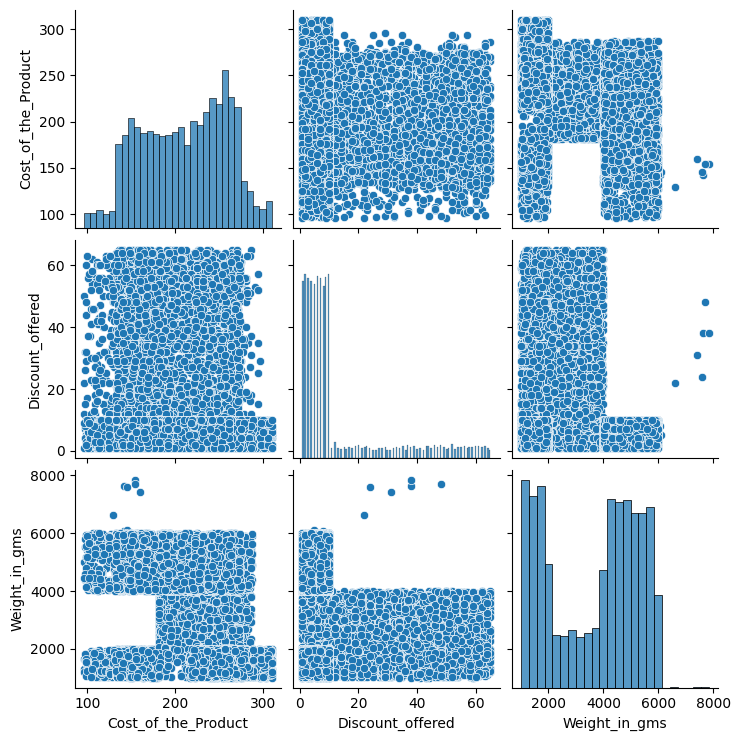

In [ ]:
plot = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
sns.pairplot(df[plot])
plt.show()

Terlihat ada beberapa outlier pada kolom 'Weight_in_gms'
Sehingga outlier akan dibuang menggunakan IQR

In [ ]:
Q1 = df['Weight_in_gms'].quantile(0.25)
Q3 = df['Weight_in_gms'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
df = df[(df['Weight_in_gms'] >= lower_bound) & (df['Weight_in_gms'] <= upper_bound)]

## Encoding

In [ ]:
# Melakukan encoding menggunakan Label Encoder
from sklearn.preprocessing import LabelEncoder

categ = df.select_dtypes(include='object').columns

le = LabelEncoder()

for column in categ:
  df[column] = le.fit_transform(df[column])

In [ ]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1


Data displit menjadi X (variabel independen) dan y (variabel dependen yang akan diprediksi)

In [ ]:
X = df.drop(['Reached.on.Time_Y.N'], axis=1) # independent variables (features)
y = df['Reached.on.Time_Y.N']                # dependent variable (target variable)

## Feature Scaling
Melakukan normalisasi pada variabel independen (X) menggunakan StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

Split data train dan test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Prediction

### Using Logistic Regression








In [ ]:
# Menggunakan Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [ ]:
# Evaluasi nilai akurasi
from sklearn.metrics import accuracy_score

akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.6407546312080918
Akurasi data test = 0.6354545454545455


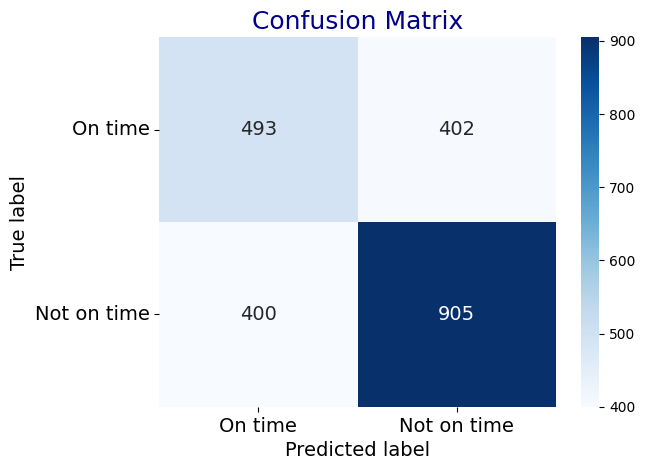

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('On time', 'Not on time'), ('On time', 'Not on time'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Using Extreme Gradient Boosting Classifier

In [ ]:
# Menggunakan XGBoost Classifier + Tuning Hyperparameter
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("XGB Classifier Best Parameters:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGB Classifier Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
xgb = XGBClassifier(**best_params)

xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

In [ ]:
# Evaluasi nilai akurasi
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.6882600295488124
Akurasi data test = 0.6886363636363636


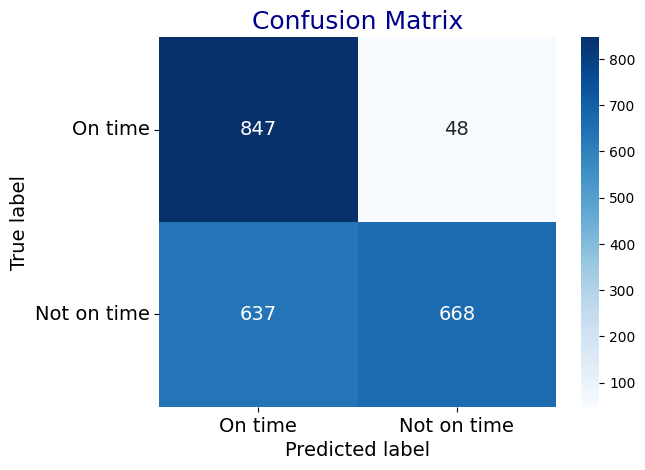

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('On time', 'Not on time'), ('On time', 'Not on time'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Using SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

model = SVC()

param_dist = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'poly']
}

rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', n_iter=1, verbose=1, cv=10, random_state=42)
rand_search.fit(X_train, y_train)

best_params = rand_search.best_params_

print("SVM Best Parameters:", best_params)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
SVM Best Parameters: {'kernel': 'linear', 'gamma': 1, 'C': 0.1}


In [ ]:
svm = SVC(**best_params)

svm.fit(X_train, y_train)

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

In [ ]:
# Evaluasi nilai akurasi
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.6607569041936584
Akurasi data test = 0.6681818181818182


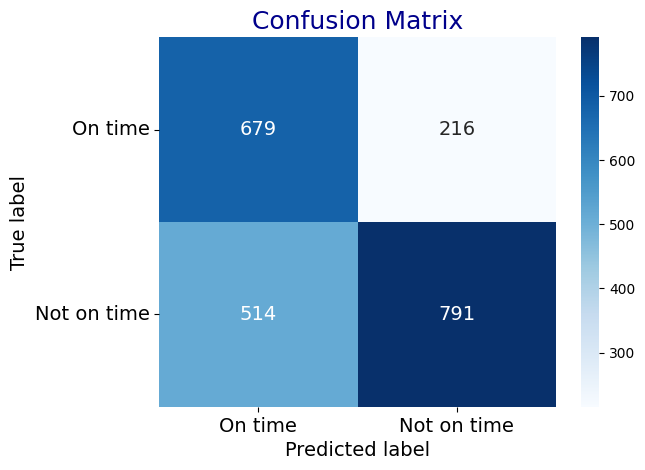

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('On time', 'Not on time'), ('On time', 'Not on time'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Using Gradient Boosting Classifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier()

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5]
}

rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', n_iter=5, verbose=1, cv=10, random_state=42)
rand_search.fit(X_train, y_train)

best_params = rand_search.best_params_

print("GB Classifier Best Parameters:", best_params)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
GB Classifier Best Parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.01}


In [ ]:
gb = GradientBoostingClassifier(**best_params)

gb.fit(X_train, y_train)

y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

In [ ]:
# Evaluasi nilai akurasi
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.6900784180020457
Akurasi data test = 0.6913636363636364


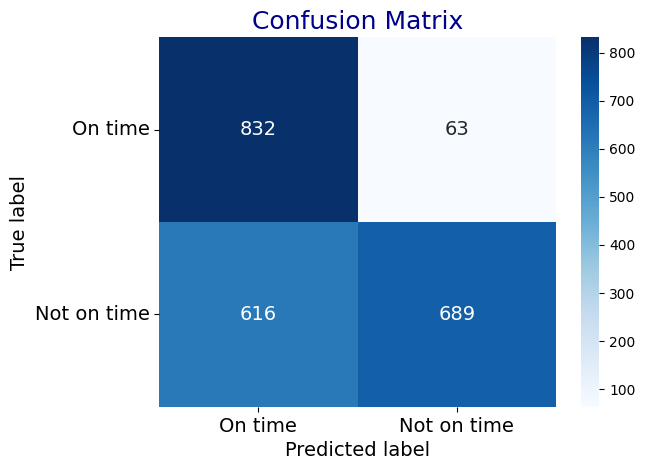

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('On time', 'Not on time'), ('On time', 'Not on time'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Using Catboost Classifier

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

model = CatBoostClassifier()

param_dist = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', n_iter=10, cv=10, random_state=42)
rand_search.fit(X_train, y_train)

best_params = rand_search.best_params_

print("Catboost Classifier Best Parameters:", best_params)

Output streaming akan dipotong hingga 5000 baris terakhir.
1:	learn: 0.6915345	total: 5.02ms	remaining: 748ms
2:	learn: 0.6907132	total: 7.28ms	remaining: 721ms
3:	learn: 0.6897849	total: 9.74ms	remaining: 720ms
4:	learn: 0.6889207	total: 12.2ms	remaining: 720ms
5:	learn: 0.6881626	total: 14.4ms	remaining: 707ms
6:	learn: 0.6873119	total: 16.9ms	remaining: 709ms
7:	learn: 0.6865291	total: 19.4ms	remaining: 709ms
8:	learn: 0.6856914	total: 22.2ms	remaining: 717ms
9:	learn: 0.6848479	total: 24.8ms	remaining: 721ms
10:	learn: 0.6839716	total: 27.4ms	remaining: 719ms
11:	learn: 0.6831783	total: 29.9ms	remaining: 717ms
12:	learn: 0.6823679	total: 32.1ms	remaining: 709ms
13:	learn: 0.6815424	total: 34.6ms	remaining: 707ms
14:	learn: 0.6807960	total: 37.1ms	remaining: 704ms
15:	learn: 0.6799426	total: 39.5ms	remaining: 701ms
16:	learn: 0.6792061	total: 41.9ms	remaining: 698ms
17:	learn: 0.6784716	total: 44.4ms	remaining: 696ms
18:	learn: 0.6776433	total: 47.2ms	remaining: 698ms
19:	learn: 0.6

In [ ]:
catboost = CatBoostClassifier(**best_params)

catboost.fit(X_train, y_train)

y_pred_train = catboost.predict(X_train)
y_pred_test = catboost.predict(X_test)

0:	learn: 0.6931170	total: 4.31ms	remaining: 427ms
1:	learn: 0.6931006	total: 7.8ms	remaining: 382ms
2:	learn: 0.6930783	total: 9.8ms	remaining: 317ms
3:	learn: 0.6930574	total: 13.3ms	remaining: 320ms
4:	learn: 0.6930412	total: 16.6ms	remaining: 316ms
5:	learn: 0.6930163	total: 19.9ms	remaining: 312ms
6:	learn: 0.6929906	total: 23.5ms	remaining: 312ms
7:	learn: 0.6929697	total: 26.9ms	remaining: 309ms
8:	learn: 0.6929493	total: 30.5ms	remaining: 308ms
9:	learn: 0.6929296	total: 33.9ms	remaining: 305ms
10:	learn: 0.6929064	total: 36.2ms	remaining: 293ms
11:	learn: 0.6928899	total: 39.6ms	remaining: 290ms
12:	learn: 0.6928707	total: 42.9ms	remaining: 287ms
13:	learn: 0.6928486	total: 46.3ms	remaining: 285ms
14:	learn: 0.6928284	total: 49.6ms	remaining: 281ms
15:	learn: 0.6928085	total: 52.9ms	remaining: 278ms
16:	learn: 0.6927849	total: 54ms	remaining: 264ms
17:	learn: 0.6927612	total: 57.5ms	remaining: 262ms
18:	learn: 0.6927386	total: 60.7ms	remaining: 259ms
19:	learn: 0.6927185	total

In [ ]:
# Evaluasi nilai akurasi
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.6913285600636436
Akurasi data test = 0.6918181818181818


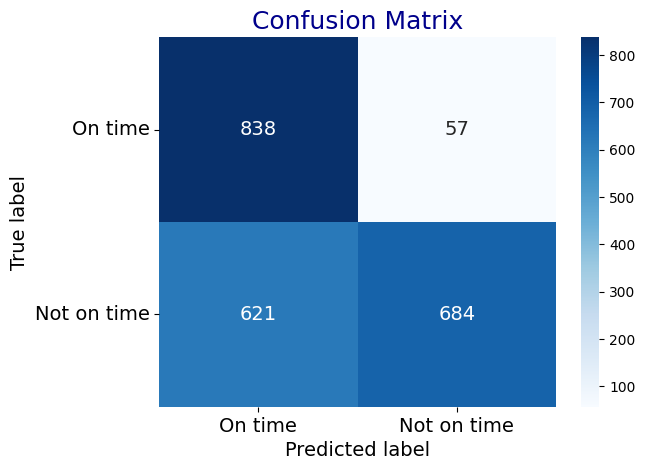

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('On time', 'Not on time'), ('On time', 'Not on time'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## Prediction Test

Karena model Catboost Classifier menunjukkan akurasi yang paling tinggi yaitu sekitar 69,18% dan tidak mengalami overfitting, maka model tersebut akan digunakan untuk prediksi.

In [ ]:
input = [[3, 0, 4, 2, 170, 2, 1, 0, 40, 1500]]
input = scaler.transform(input)
y_pred_inputan = catboost.predict(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_inputan

array([1])

In [ ]:
if y_pred_inputan[0] == 0:
  print("Prediction: On Time")
else:
  print("Prediction: Not On Time")

Prediction: Not On Time
